In [20]:
# Import Nessasary Liabraries
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from PIL import Image
import matplotlib.pyplot as plt

In [22]:
# Step 1: Load and preprocess the data
# Assuming you have a CSV file containing image file paths and corresponding prices
data = pd.read_csv('Vision.csv')
image_paths = data['image_paths'].values
prices = data['price'].values

In [23]:
# Step 2: Load and preprocess the images
image_height = 128
image_width = 128
channels = 3
num_images = len(image_paths)

X = np.empty((num_images, image_height, image_width, channels))
y = np.empty(num_images)

for i, image_path in enumerate(image_paths):
    # Load and resize the image using a suitable image processing library (e.g., PIL)
    image = Image.open(image_path)
    image = image.resize((image_height, image_width))
    
    # Normalize the image
    image = np.array(image) / 255.0
    
    # Store the processed image in X
    X[i] = image
    
    # Store the corresponding price in y
    y[i] = prices[i]

In [24]:
# Step 3: Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
# Step 4: Build the CNN model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(image_height, image_width, channels)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(1))  # Output layer for regression

In [26]:
# Step 5: Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [27]:
# Step 6: Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32)

Epoch 1/10
1/1 [==============================] - 2s 2s/step - loss: 20131476.0000
Epoch 2/10
1/1 [==============================] - 1s 579ms/step - loss: 19964154.0000
Epoch 3/10
1/1 [==============================] - 1s 557ms/step - loss: 19728588.0000
Epoch 4/10
1/1 [==============================] - 1s 512ms/step - loss: 19374920.0000
Epoch 5/10
1/1 [==============================] - 1s 524ms/step - loss: 18879294.0000
Epoch 6/10
1/1 [==============================] - 1s 520ms/step - loss: 18212698.0000
Epoch 7/10
1/1 [==============================] - 1s 530ms/step - loss: 17344668.0000
Epoch 8/10
1/1 [==============================] - 1s 547ms/step - loss: 16254869.0000
Epoch 9/10
1/1 [==============================] - 1s 534ms/step - loss: 14929234.0000
Epoch 10/10
1/1 [==============================] - 1s 532ms/step - loss: 13358765.0000


In [28]:
# Step 7: Evaluate the model
loss = model.evaluate(X_test, y_test)
print('Test loss:', loss)

1/1 [==============================] - 0s 192ms/step - loss: 25730704.0000
Test loss: 25730704.0


In [29]:
# Step 8: Make predictions
predictions = model.predict(X_test)

1/1 [==============================] - 0s 199ms/step


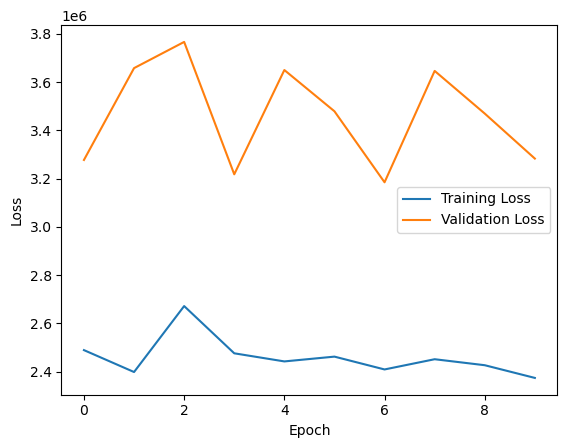

In [30]:
# Step 9: Plot the training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

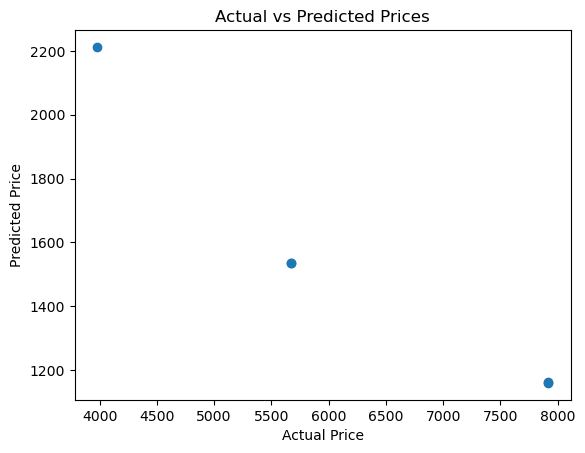

In [32]:
# Step 10: Plot predicted prices vs actual prices
plt.scatter(y_test, predictions)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Prices')
plt.show()